In [1]:

# 3:23 left 3/30
# Downloads and saves ATNF page
import urllib.request
import time
import re
import pickle

url = "https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&Name=Name&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+csv+with+errors&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query&table_bottom.x=48&table_bottom.y=22"
# main1-url = 'https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&JName=JName&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+with+last+digit+error&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query&table_bottom.x=77&table_bottom.y=17'
#url = 'https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&table_top.x=74&table_top.y=18&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+with+last+digit+error&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query'
#url = "https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+with+errors&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query&table_bottom.x=31&table_bottom.y=23"

with urllib.request.urlopen(url) as response:
   text = response.read().decode("utf-8")


with open('pulsars.page', 'wb') as pulsarDoc:
    pickle.dump(text, pulsarDoc)


In [76]:
from astropy.io import ascii
from astropy.table import Table
import pickle
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
 
startpos = 31 # which line the content starts on
endpos = -5
 
with open('pulsars.page', 'rb') as pulsarDoc:
    pulsar_doc = pickle.load(pulsarDoc)
     
pulsars = pulsar_doc.split("\n")
 
columns=['N',
          'Name',
          'Name_REF',
          'RAJ',
          'RAJ_ERR',
          'RAJ_REF',
          'DECJ',
          'DECJ_ERR',
          'DECJ_REF',
          'DM',
          'DM_ERR',
          'DM_REF',
          'S400',
          'S400_ERR',
          'S400_REF',
          'S1400',
          'S1400_ERR',
          'S1400_REF',
          'S2000',
          'S2000_ERR',
          'S2000_REF',
          'ASSOC',
          'L400',
          'L1400',
          'extra']
 
pulsars = pulsars[startpos:len(pulsars)+endpos-1] #This trims it down to only the pulsars
 
num_cols=np.array([len(x.split(';')) for x in pulsars])
bad_rows=np.where(num_cols != num_cols[0])[0]
sum=0
for row in bad_rows:
    pulsars.pop(row-sum)
    sum+=1
 
data=ascii.read('\n'.join(pulsars),format='no_header',
                 delimiter=';',names=columns,
                 fill_values=[('*','-99')])


coords=SkyCoord(data['RAJ'],data['DECJ'],unit=('hour','deg'))
print(coords[0].dec.degree)
print(type(coords[0].dec.degree))
print(data[0])

with open('pulsars.table', 'wb') as pulsarDoc:
    pickle.dump(data, pulsarDoc)
with open('pulsars.skycoords', 'wb') as skycoords:
    pickle.dump(coords,skycoords)

62.26927777777777
<class 'numpy.float64'>
 N     Name    Name_REF     RAJ     RAJ_ERR RAJ_REF     DECJ    DECJ_ERR DECJ_REF   DM  DM_ERR DM_REF S400 S400_ERR S400_REF S1400 S1400_ERR S1400_REF S2000 S2000_ERR S2000_REF                              ASSOC                               L400 L1400 extra
--- ---------- -------- ----------- ------- ------- ----------- -------- -------- ----- ------ ------ ---- -------- -------- ----- --------- --------- ----- --------- --------- ---------------------------------------------------------------- ---- ----- -----
  1 J0002+6216   cwp+17 00:02:58.17    0.02  cwp+17 +62:16:09.4      0.1   cwp+17 218.6    0.6 wcp+18   --      0.0       -- 0.022       0.0      wu18    --       0.0        -- GRS:3FGL_J0002.6+6218[aaa+15],XRS:1XSPS_J000257.6+621609[wcp+18]   --  0.89      


In [62]:
#alternative, using psrqpy. WIP
import psrqpy as ps
from astropy.table import Column
import numpy


table = ps.QueryATNF().catalogue_table
table.add_column(Column(np.arange(len(table)),name="N"), index=0)
print(table)


 N       PSRJ    PSRJ_REF      RAJ       ... ASSOC_REF TYPE_ORIG  BINCOMP_ORIG
                                         ...                                  
---- ----------- -------- -------------- ... --------- ---------- ------------
   0  J0002+6216   cwp+17    00:02:58.17 ...    aaa+15 HE[wcp+18]           --
   1  J0006+1834    cnt96     00:06:04.8 ...                   --           --
   2  J0007+7303  aaa+09c     00:07:01.7 ...    naa+12       NRAD           --
   3    J0011+08   dsm+16       00:11:34 ...                   --           --
   4  J0014+4746       --    00:14:17.75 ...                   --           --
   5  J0023+0923   hrm+11  00:23:16.8772 ...    aaa+15         HE   UL[hrm+11]
   6 J0024-7204C       --  00:23:50.3546 ...    bgh+06         --           --
   7 J0024-7204D       -- 00:24:13.88092 ...    bgh+06         --           --
   8 J0024-7204E       -- 00:24:11.10528 ...    bgh+06         --           --
   9 J0024-7204F       -- 00:24:03.85547 ...    bgh+

In [70]:
#table.colnames
for i in table["DECJ"]:
    print(type(i))

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy

In [22]:
# Test cell only, not relavent. tableget will retrieve stuff from either method above. 
import tableGet as tg
#V[num] is the version number of the matarial source. Creates new table with no delations of old ones
#hasDM - it has a measured DM
#posErrorASec[num] has an error in position less than a specific number of arcseconds
#posRange[num1,num2,num3,num4] Declination and RA ranges (low-high)

table = tg.tableGet(["V[test12]","hasDM", "posErrorASec[01]", "posRange[0:0:0.0,24:0:0.0,-90:0:0.0,90:0:0.0]"])

print(len(table))
print(table[-1])

# ~1200 pulsars are cut when pos error is 1 arcsec. This leaves ~1600 good ones.

1639
 N     Name   Name_ref      RAJ      RAJ_err RAJ_ref      DECJ     DECJ_err DECJ_ref   DM   DM_err DM_ref S400 S400_err S400_ref S1400 S1400_err S1400_ref S2000 S2000_err S2000_ref ASSOC  L400  L1400 extra
---- -------- -------- ------------- ------- ------- ------------- -------- -------- ------ ------ ------ ---- -------- -------- ----- --------- --------- ----- --------- --------- ----- ------ ----- -----
2799 B2351+61   dbtb82 23:54:04.7830  0.0001  dgb+19 +61:55:46.845    0.001   dgb+19 94.662  0.006 hlk+04 17.0      3.0   lylg95   5.0       1.0    lylg95    --       0.0        --    -- 101.13 29.74      


In [42]:
# goes through and finds all objects in the tables from the mosiacs, putting them into a single list

import os
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u

import re
import time
path = 'tables/racs_catv'
file_names = os.listdir(path)
file_infos = []

#print(file_names)

for i in file_names: 
    if 'selavy.txt' in i:
        file = open(path + "/" + i, "r")
        file_info = file.read().split("\n")
        mos_filename = file_info[4][67:]
        items = file_info[47:]
        # ObjID Name X Y Z RA DEC RA DEC VEL MAJ MIN PA w_RA w_DEC w_50 w_20 w_VEL F_int F_tot F_peak 
        # X1 X2 Y1 Y2 Z1 Z2 Nvoxel Nchan Nspatpix Flag X_av Y_av Z_av X_cent Y_cent Z_cent X_peak Y_peak Z_peak
        # [deg] [deg] [arcsec] [arcsec] [deg] [arcmin] [arcmin] [Jy]  [Jy/beam] [Jy/beam] 
        for ii in range(len(items)):
            items[ii] = re.split(r' {1,}', items[ii].strip())
            if len(items[ii]) != 1:
                coord = SkyCoord(items[ii][5], items[ii][6], unit=(u.hourangle, u.deg))
                
                items[ii].append(coord)
                items[ii].append(mos_filename)

                file_infos.append(items[ii])



#print(len(real_file_info))
print(len(file_infos))
with open('table_info', 'wb') as table_infos:
    pickle.dump(file_infos, table_infos)

In [64]:
# Turns objects from mosiacs into list of sky coord from astropy and checks them against pulsars
from astropy.coordinates import match_coordinates_sky
import tableGet as tg
import pickle
from astropy.coordinates import SkyCoord
import astropy.units as u

with open('table_info', 'rb') as objectDoc:
    skyObjects = pickle.load(objectDoc)
    
with open('pulsars.skycoords', 'rb') as objectDoc:
    pulsarCoords = pickle.load(objectDoc)
    
        
#print(len(coordList))



catalog = SkyCoord(ra = (i[5] for i in skyObjects), dec = (i[6] for i in skyObjects), unit=(u.hourangle, u.deg))
pulsars = tg.tableGet(["V[test10]","hasDM", "posErrorASec[01]", "posRange[0:0:0.0,24:0:0.0,-90:0:0.0,90:0:0.0]"])
matches = []
for i in pulsars:
    match = pulsarCoords[i[0]-1].match_to_catalog_sky(catalog)
    matches.append([match, i, skyObjects[match[0]]])

print(len(matches))
print(len(pulsars))
print(matches[0])

1639
1639
[(array(113393), <Angle [20.94481776] deg>, <Quantity 0.36352402>), <Row index=0>
  N      Name    Name_ref     RAJ     RAJ_err RAJ_ref     DECJ    DECJ_err DECJ_ref    DM    DM_err DM_ref   S400  S400_err S400_ref  S1400  S1400_err S1400_ref  S2000  S2000_err S2000_ref                              ASSOC                                 L400   L1400  extra
int64   str12      str7      str16    float64   str7     str16    float64    str7   float64 float64  str7  float64 float64    str6   float64  float64     str7   float64  float64     str6                                str86                               float64 float64  str1
----- ---------- -------- ----------- ------- ------- ----------- -------- -------- ------- ------- ------ ------- -------- -------- ------- --------- --------- ------- --------- --------- ---------------------------------------------------------------- ------- ------- -----
    1 J0002+6216   cwp+17 00:02:58.17    0.02  cwp+17 +62:16:09.4      0.1   cwp

In [65]:
# Crops the matches
import astropy.units as u
#print(matches[0][2])
close_matches = []
for i in matches:
    if (i[0][1] < 5 * u.arcsec)[0]:
        #print(i[1][0].split(":"))
        #f len(i[1][0].split(":")) == 3 and len(i[1][2].split(":")) == 3:

        close_matches.append(i)

#for i in close_matches:
    #print(i[-1])
print(len(close_matches))
print(close_matches[0][2])

35
['68', 'B0304+1932', '5889.2', '7305.8', '0.0', '03:04:32.9', '+19:32:50', '46.136912', '19.547237', '0.000', '14.44', '10.34', '170.10', '0.21', '0.25', '0.000', '0.000', '0.000', '0.00056', '0.0187', '0.00125', '5887', '5891', '7303', '7308', '0', '0', '21', '1', '21', '-', '5889.1', '7305.7', '0.0', '5889.2', '7305.8', '0.0', '5889', '7306', '0', <SkyCoord (ICRS): (ra, dec) in deg
    (46.13708333, 19.54722222)>, 'RACS_test4_1.05_0303+18A-selavy.txt']


In [68]:
# Creates region file
import pickle

region_info = """# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5"""

for i in close_matches:
    region_info += "\n" + "circle(" + str(i[1][3]) + "," + str(i[1][6]) + "," + str(60) +'")'
print(region_info)
file = open("regions","w") 
file.write(region_info)
file.close() 


# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
circle(03:04:33.115,+19:32:51.4,60")
circle(04:37:15.8961737,-47:15:09.110714,60")
circle(05:36:30.82,-75:43:54.8,60")
circle(06:14:17.0058,+22:29:56.848,60")
circle(06:30:49.404393,-28:34:42.77881,60")
circle(07:11:54.189114,-68:30:47.41446,60")
circle(07:38:32.262,-40:42:39.42,60")
circle(07:42:49.058,-28:22:43.76,60")
circle(08:20:26.3817,-13:50:55.859,60")
circle(08:20:15.45,-41:14:35.3,60")
circle(08:35:20.61149,-45:10:34.8751,60")
circle(08:37:21.1943,-41:35:14.563,60")
circle(09:22:14.022,+06:38:23.30,60")
circle(09:44:28.9559,-13:54:41.63,60")
circle(09:53:09.3097,+07:55:35.75,60")
circle(10:22:57.9957,+10:01:52.765,60")
circle(10:56:25.584,-62:58:47.69,60")
circle(11:57:08.166,-51:12:56.14,60")
circle(12:24:44.25,-62:08:41.1,60")
circle(12:43:35.38,-57:35:42.8,60")
circle(13:27:57.5880,-0

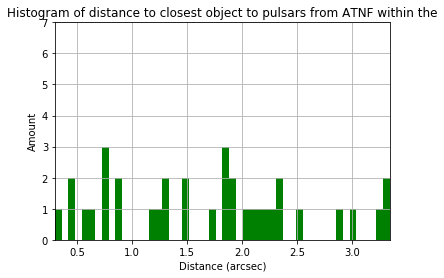

In [69]:
#Histogram of how close matches are overall
import astropy.units as u

import numpy as np
import matplotlib.pyplot as plt

distances = []
for i in close_matches:
    distances.append(i[0][1][0].decompose() * (206265/u.rad))
    
distances.sort()
#print(distances)

plt.hist(distances, 50, facecolor='g')
plt.xlabel('Distance (arcsec)')
plt.ylabel('Amount')
plt.title('Histogram of distance to closest object to pulsars from ATNF within the')
plt.xlim(distances[0], distances[-1])
plt.ylim(0, len(distances)/5)
plt.grid(True)
#plt.figure(figsize=(200,10))
plt.show()